In [39]:
# pytorch,tensorflow = deep learning framework
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [3]:
# 이미지 --> 0 ~ 9 라는 10개의 서로 다른 class output을 
# 만들어내고자 한다
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

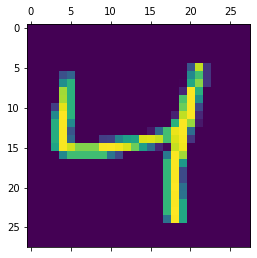

In [6]:
plt.matshow(X_train[2])

In [7]:
y_train[2]

4

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train.shape 

(60000, 28, 28)

In [24]:
# scaling
# tends to improve accuracy
X_train = X_train / 255
X_test  = X_test / 255

In [25]:
# flat matrix --> 1 vector
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [14]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [26]:
model = keras.Sequential([
   # accept every layer as one element
   # create Dense layer 
   # 10 : output layer 
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


# compile
# optimizer : let training occur effectively
model.compile(
    optimizer='adam',
    # 만일 one hot encoding 이었다면
    # categorical_crossentropy 를 사용했을 것이다
    # MeanSquaredError을 사용했을 수도 있을 것이다
    # loss = "mean_squared_error"
    loss = 'sparse_categorical_crossentropy',
    # goal is to make it more accurate
     metrics=['accuracy']
)

In [27]:
model.fit(X_train_flattened, y_train, epochs=5)
# 점차, accuracy가 증가, loss 가 감소해가는 것을 확인할 수 있다

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4688 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3041 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2839 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9256


In [28]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2702 - accuracy: 0.9244


[0.2701611816883087, 0.9243999719619751]

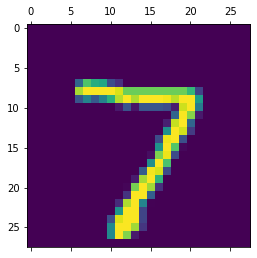

In [30]:
plt.matshow(X_test[0])

In [32]:
y_predicted = model.predict(X_test_flattened)

In [33]:
y_predicted[0]

array([3.21192443e-02, 7.13208578e-07, 6.62363768e-02, 9.68364239e-01,
       1.88690424e-03, 1.17670655e-01, 1.17326204e-06, 9.99862373e-01,
       1.06558114e-01, 7.78038085e-01], dtype=float32)

In [34]:
# max value의 idx
np.argmax(y_predicted[0])

7

In [37]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [42]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    5,    2,    1,    1],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   9,    9,  932,   15,    6,    1,   12,   11,   32,    5],
       [   4,    0,   21,  929,    0,   12,    3,   11,   20,   10],
       [   1,    1,    4,    1,  892,    0,   14,    5,    8,   56],
       [  10,    3,    3,   42,    9,  760,   16,    9,   31,    9],
       [  14,    3,    7,    1,    7,   10,  912,    2,    2,    0],
       [   1,    5,   23,    5,    3,    0,    0,  958,    3,   30],
       [   9,    8,    7,   31,    9,   25,   10,   14,  849,   12],
       [  12,    6,    1,   10,   14,    4,    0,   25,    4,  933]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

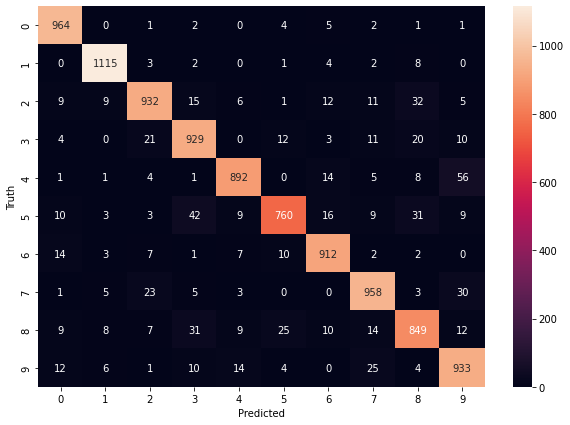

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
# add hidden layer 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # hidden layer로 100개의 neuron을 세팅
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# layer가 없을 때 92% 였던 정확도가 99% 까지 증가한 것을 확인할 수 있다
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2747 - accuracy: 0.9212
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1259 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0877 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0305 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0246 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [45]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0931 - accuracy: 0.9748


[0.09307488799095154, 0.9747999906539917]